<img src="https://cdn.dal.ca/about-dal/history-tradition/logo-seal/_jcr_content/contentPar/staticimage.adaptive.full.high.png/1654529048363.png" alt="Dalogo" width="200"/>

# CSCI 4144 -  Data Mining and Data Warehousing
# Assignment 2 - Cube Computation

**Due:** 24 February 2023, 19h AT

**Your name:** \[James McKinlay\]  
**Your Banner ID:** \[B00867096\]  
**Your NetID:** \[jm651986\]

### Assessment

***!This cell is completed only by your marker!***


| #  | Section       |Mark | Out of  |  Comments |
|----|---------------|-----|---------|-----------|
| 1  | Section 1     |     | / 8    |           |
| 2  | Section 2     |     | / 22    |           |
| 3  | Bonus         |     | / 5    |           |
| -  | TOTAL         |     | / 30    |           |

In [219]:
# import any libraries here
import pandas as pd
import numpy as np
import seaborn as sns
import requests

# TODO: add any additional libraries here

# your code should run in Python3

## Section 1 - Discretization

In this section, you will first minimally preprocess some data in order to make all inputs nominal.

### Dataset

Anti-democratic political movements, of various sizes, are springing up across many democratic nations, including Brazil. Your data is from the [Brazil Conflict Tracker](https://www.kaggle.com/datasets/justin2028/brazil-conflict-tracker-20182023). This is a dataset that tracks both non-violent and violent conflicts in Brazil since 2018. The 8 January 2023 invasion of Brazil's National Congress by Jair Bolsonaro supporters served as inspiration for this dataset. All data are official figures from the Armed Conflict Location & Event Data Project (ACLED) that have been compiled and structured by Justin Oh and released under the [CC BY-NC-SA 4.0](https://creativecommons.org/licenses/by-nc-sa/4.0/) license.

The single file is in the [CSV](https://www.w3schools.com/python/pandas/pandas_csv.asp) file format, with a single header row and the several fields, including:

| Field                       | Type      | Description |
|-----------------------------|-----------|-------------|
|    EVENT_DATE | Date | The day, month and year on which a conflict event took place. |
|    EVENT_TYPE | Nominal | The type of conflict. |
|    SUB_EVENT_TYPE | Nominal | The type of sub-conflict.|
|    ACTOR1 | Nominal | The named actor in the conflict. |
|    ACTOR2 | Nominal | The named actor associated with or identifying ACTOR 1.|
|    COUNTRY | Nominal | The country in which the conflict took place (Brazil).|
|     LOCATION | Nominal | The specific location in which the conflict took place.|
|     LATITUDE | Real number | The latitude of the location.|
|     LONGITUDE | Real number | The longitude of the location.|
|    SOURCE_SCALE| Nominal| The scale (local, regional, national, international) of the source.|
|   NOTES | String | A short description of the conflict.|
|    FATALITIES | Integer | The number of reported fatalities that occurred during the conflict.|


### Tasks

First, some of the data (i.e., the precise location) is in the format of real numbers, which some of our subsequent computation will find difficult to handle.

Complete each of the code cells below according to the instructions in the comments. For each section, markers may take away marks for excessively poor quality code, at their discretion.



In [220]:
# 1. load the data in a Pandas DataFrame. 

url = 'https://dalu-my.sharepoint.com/:x:/g/personal/fr591304_dal_ca/EUZAHF0CniNJill1eu-m5GQB3v0JKhK6kjTZrutK5bUgpQ?e=pxd0kh'

# TODO: your code goes here. Be sure to handle potential errors. 

df = pd.read_csv("Brazil Political Violence and Protests Dataset (1).csv")
print(df.head())

is_nan = df.isna()
nan_count = df.isna().sum()

print(is_nan)
print(nan_count)


        EVENT_DATE                  EVENT_TYPE    SUB_EVENT_TYPE  \
0  01-January-2018                    Protests  Peaceful protest   
1  01-January-2018                    Protests  Peaceful protest   
2  01-January-2018  Violence against civilians            Attack   
3  01-January-2018  Violence against civilians            Attack   
4  01-January-2018  Violence against civilians            Attack   

                                    ACTOR1              ACTOR2 COUNTRY  \
0                      Protesters (Brazil)                 NaN  Brazil   
1                      Protesters (Brazil)                 NaN  Brazil   
2        Unidentified Armed Group (Brazil)  Civilians (Brazil)  Brazil   
3  Unidentified Gang and/or Police Militia  Civilians (Brazil)  Brazil   
4        Unidentified Armed Group (Brazil)  Civilians (Brazil)  Brazil   

                   LOCATION  LATITUDE  LONGITUDE SOURCE_SCALE  \
0                  Teresina    -5.089    -42.802     National   
1               

In [221]:
# 2. Discretize the data.
#    Convert the each (latitude, longitude) pair into a discrete integer, 
#    which we can consider to be a nominal category. You will do this using two functions, 
#    both of which have the following inputs and output:
#        inputs:  'data': nx2 numpy array. The raw latitude and longitude columns from the original data,
#                                         in the original order.
#                 'H':    integer.         The number of bins of height/latitude, across the range of all latitudes
#                 'W':    integer.         The number of bins of width/longitude, across the range of all longitudes
#        
#        outputs: 'out':  list of ints.    The ith element is the index of the bin in the HxW grid, 
#                                         of the ith row in the given 'data', computed H first, e.g.:
#                                         | 0 | 3 | 6 |  9 |
#                                         | 1 | 4 | 7 | 10 |
#                                         | 2 | 5 | 8 | 11 |
#                                         for H=3 and W=4
#
#     First, use the 'equal width' method. See, e.g., Lecture 3, slide 40.
#     

#making sure that latitude and longitude are numerical columns
df['LATITUDE'] = pd.to_numeric(df['LATITUDE'], errors='ignore')
df['LONGITUDE'] = pd.to_numeric(df['LONGITUDE'], errors='ignore')
print(df['LATITUDE'].dtype)
print(df['LONGITUDE'].dtype)


def equalWidth( data:np.ndarray, H:int, W:int ):
    # this function uses the 'equal width' method of binning, where the range of each bin is the same,
    # across each dimension independently
    out = []
    # TODO: your code goes here
    row = data.shape[0]
    
    #minimum latitude and longitute
    minimum_lat = data['LATITUDE'].min()
    minimum_long = data['LONGITUDE'].min()
    #maximum latitude and longitude
    maximum_lat = data['LATITUDE'].max()
    maximum_long = data['LONGITUDE'].max()
    
    #Given min(𝑋) and max(𝑋) of attribute 𝑋, the width of
    #each interval will be: 𝑊 = (max(𝑋) – min(𝑋))/𝑁    -> From lecture 3 slide 40
    latitude_width = (maximum_lat - minimum_lat) / H
    longitude_width = (maximum_long - minimum_long) / W
    
    for i in range(row):
        latitude_bin = ((data.iloc[i,7] - minimum_lat) / latitude_width)
        longitude_bin = ((data.iloc[i,8] - minimum_long) / longitude_width)
        bin_index = int(latitude_bin * W + longitude_bin)
        out.append(bin_index)
        
    return out

#Notes: Try a simple for loop for indexing? Nice, that works 
#Make sure to double check columns (if numeric)
#make sure you select the correct columns in the for loop for binning (use iloc)

float64
float64


In [222]:
# 3. Discretize the data with the 'equal depth' method
#    The same as above, but with the 'equal depth' method

def equalDepth( data:np.ndarray, H:int, W:int ):
    # this function uses the 'equal depth' method of binning, where the number of elements in each bin
    # is approximately same. Given any remainder 'r' of N / (HxW), 'r' bins will have one more element 
    # than the rest.
    out = []
    N = data.shape[0]
    
    # selecting the needed columns (ie: latitude and longitude)
    latitude_column = data['LATITUDE']
    longitude_column = data['LONGITUDE']
    
    #using qcut to generate latitude bins
    latitude_bins = pd.qcut(latitude_column, H, labels=False)
    
    #using qcut to generate longitude bins    
    longitude_bins = pd.qcut(longitude_column, W, labels=False)
    
    #computing the index for each value in the bins
    df['index'] = latitude_bins * W + longitude_bins
    
    out = df['index'].tolist()
    
    return out


#I think this is the same as equal frequency

#https://pandas.pydata.org/docs/reference/api/pandas.cut.html
#https://stackoverflow.com/questions/46472809/python-binning-based-on-2-columns-in-pandas
#https://pbpython.com/pandas-qcut-cut.html
#oh goodness that was tough. Somehow removing the H from the index computation made it work? 

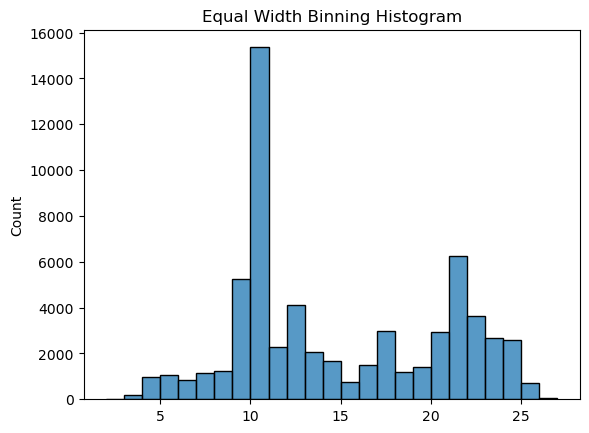

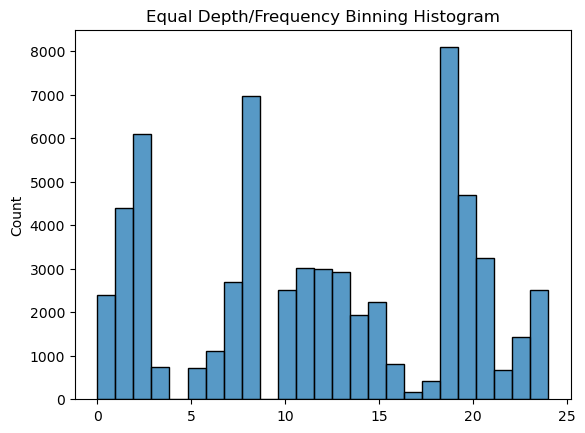

In [223]:
# 4. Plot the discretized data.
#    Using the seaborn.histplot (https://seaborn.pydata.org/generated/seaborn.histplot.html) function,
#    plot the outputs of equalWidth() and equalDepth() above with the following parameters:
#       (H: 5, W: 5)

    # TODO: your code goes here
import matplotlib.pyplot as plt

#print(df.head())
width_bins = equalWidth(df, 5, 5)
frequency_bins = equalDepth(df, 5, 5)
#print(width_bins)
#print(frequency_bins)
sns.histplot(width_bins, bins=5*5)
plt.title('Equal Width Binning Histogram')
plt.show()
sns.histplot(frequency_bins, bins=5*5)
plt.title('Equal Depth/Frequency Binning Histogram')
plt.show()

### Assessment for section 1

***!This cell is completed only by your marker!***


| #  | Task          |Mark | Out of  |  Comments |
|----|---------------|-----|---------|-----------|
| 1  | Load          |     | / 1     |           |
| 2  | equalWidth()  |     | / 3     |           |
| 3  | equalDepth()  |     | / 3     |           |
| 4  | plot          |     | / 1     |           |
| -  | TOTAL         |     | / 8      |           |


## Section 2 - Bottom-up computation

Here, you will code the 'bottom-up computation' method described in class (i.e., Lecture 5, Slides 45-54). In particular, you have pseudocode (in Lecture 5, Slides 50-51) and extra detail at these locations:

- The original paper (in this course's [BrightSpace](https://dal.brightspace.com/d2l/le/content/250788/viewContent/3515315/View))
- In this University of Regina [tutorial](http://www2.cs.uregina.ca/~dbd/cs831/notes/dcubes/iceberg.html)

Unfortunately, the code provided by the paper may be confusing with regards to how we actually *write* the records we approve (and, technically, there appears to be an error in their pseudocode). For simplicity, we will modify the BUC algorithm from Lecture 5 (Slide 55), with the crossed out bits removed in two ways:

1. We will have a new parameter, `curState` which is an $n$-dimensional list of strings representing the current cell state, where '\*' is aggregate, of the current level of abstraction of the call. 
    1. I.e., the first call to BUC(...) is the apex, so the list would be ['\*','\*',...,'\*'].
    2. Every recursive call to BUC(...) will update this list to add specificity to the list. I.e., if the current value for dimension 1 is 'aaa', then you would call BUC(...) with `curState` = ['aaa','\*',...,'\*']
2. Once you have returned from the recursive call to BUC(...), i.e., line 12 in the pseudocode, you should append your new augmented `curState` to the global output record, `outputRec`. 
    1. Note that his should be a string in the format of (Lec 5, Slide 9-10), i.e., '(a_1, a_2, ..., a_n):m' where, again, aggregate dimensions are just '*' without quotes and `a_i` is the literal dimension label.


Complete each of the code cells below according to the instructions in the comments. For each section, markers may take away marks for excessively poor quality code, at their discretion.

In [224]:
# 1. PREPARE data for using BUC
#       1) REMOVE the following dimensions from the original data:
#              - EVENT_DATE
#              - SUB_EVENT_TYPE
#              - ACTOR2
#              - COUNTRY
#              - LOCATION
#              - NOTES

# TODO: your code goes here
width_bins = equalWidth(df, 5, 5)
df2 = df.drop(['EVENT_DATE', 'SUB_EVENT_TYPE', 'ACTOR2', 'COUNTRY', 'LOCATION', 'NOTES'], axis=1)
#print(df2.head())

#       2) REPLACE the LATITUDE and LONGITUDE dimensions in the original data
#          with a new dimension, 'LOC', consisting of the integers produced by your
#          equalWidth() function, above, using H=5 and W=5
#          Your dimensions are now:
#             0: EVENT_TYPE
#             1: ACTOR1
#             2: LOC
#             3: SOURCE_SCALE
#             4: FATALITIES
width_bins = equalWidth(df, 5, 5)
df2['LOC'] = width_bins
df2 = df2.drop(['LATITUDE','LONGITUDE'], axis=1)
#print(df2.head())

numDims = 5

# TODO: your code goes here

#       3) internally SORT all the data. This is expected by BUC. You can do it easily using
#          the Pandas sort_values() function (see https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sort_values.html)
#          e.g., for a dataframe df with 4 columns, 'col1'..'col4', you would use:
#                 df.sort_values(by=['col1','col2','col3','col4'])

df2 = df2.sort_values(by=['EVENT_TYPE', 'ACTOR1', 'LOC', 'SOURCE_SCALE', 'FATALITIES'])
print(df2.head())


# TODO: your code goes here

#       4) FILL the list 'card' with the cardinalities (number of unique elements)
#          in each dimension, indexed as above.

card = []

# TODO: your code goes here
#Must remember to get all columns, not rows using :i instead of i: 
for i in range(numDims):
    card.append(len(df2.iloc[:, i].unique()))

#       5) COMPUTE the 'dataCount' variable, which is a list of lists where
#          dataCount[d] is a list of integers, each of size card[d]
#          dataCount[d][i] is the size of a partition for variable 'i'

dataCount = []
columns = df2.columns
# TODO: your code goes here
for i in range(numDims):
    counts = df2.groupby(df2.columns[i])[df2.columns[i]].count().values.tolist()
    dataCount.append(counts)
    
#       6) THINK about what 'outputRec' will have in it. As mentioned above, it is a list of cells and
#          their measures meeting the min_sup constraint

outputRec = []

      EVENT_TYPE                  ACTOR1 SOURCE_SCALE  FATALITIES  index  LOC
12169    Battles  ADA: Amigos dos Amigos     National           0      2   10
12299    Battles  ADA: Amigos dos Amigos     National           0      8   10
12458    Battles  ADA: Amigos dos Amigos     National           0      8   10
12399    Battles  ADA: Amigos dos Amigos     National           1      8   10
9905     Battles  ADA: Amigos dos Amigos    New media           0      2   10


In [225]:
# 2. Code the recursive BUC function 
#        inputs:  'input':     pandas df      Previously sorted data (see above).
#                 'curState':  list of str    The current state, as described above
#                 'dim':       integer.       The starting dimension for this iteration
#        globals: 'numDims':   integer.       The total number of dimensions
#                 'card':      list of ints.  Where card[d] is the cardinality of dimension d
#                 'minSup':    integer.       The minimum support
#                 'dataCount': list of lists. dataCount[d] is a list of integers, each of size card[d]
#                                             dataCount[d][i] is the size of a partition for variable 'i'
#        output:  

# TODO: you can create any helper functions you want here

def BUC( input, curState, dim:int ):   
    # TODO: your code goes here
    #making sure values are input correctly from arguments
    print(f"input= {input}, curState= {curState}, dim= {dim}")

    #global variables
    global numDims, card, minSup, dataCount
    outputRec = []
    
    #cardinality computation
    C = card[dim]
    
    # attempting to partition the data
    partitions = []
    for i in range(C):
        partitions.append(input[input[:, dim] == i])
    
    #recursive loop
    for i in range(C):
        c = len(partitions[i])
        #seeing if my values are correct
        print(f"size of dim={dim}, val={i}: {c}")
        if c >= minSup:
            status = curState.copy()
            status[dim] = i
            print(f"curState now= {status}")
            BUC(partitions[i], status, dim + 1)
        
        for j in range(c):
            record = curState.copy()
            for k in range(numDims):
                if k != dim:
                    record[k] = input[j][k]
            record[dim] = i
            record[-1] = 1
            outputRec.append(record)
    return

#my attempt at following the guidelines and pseudocode provided.  Doesn't work unfortunately.


In [226]:
# 3. Run the computation of the BUC function
#    run it once with minSup = 10 and once with minSup = 5
#    print the number of elements in `outputRec` in each case, 

# TODO: your code goes here
outputRec = []
minSup = 10
numDims = 5
print(df2.values)
BUC(df2.values, ['*', '*', '*', '*', '*'], 0)
display(outputRec)

minSup = 5

# TODO: your code goes here
#WHHYYY IS THERE NO VALUESSS???

[['Battles' 'ADA: Amigos dos Amigos' 'National' 0 2 10]
 ['Battles' 'ADA: Amigos dos Amigos' 'National' 0 8 10]
 ['Battles' 'ADA: Amigos dos Amigos' 'National' 0 8 10]
 ...
 ['Violence against civilians' 'Unidentified Gang and/or Police Militia'
  'Subnational' 1 20 26]
 ['Violence against civilians' 'Vala Gang' 'Subnational' 1 13 12]
 ['Violence against civilians' 'Zinho Police Militia' 'New media' 0 2 10]]
input= [['Battles' 'ADA: Amigos dos Amigos' 'National' 0 2 10]
 ['Battles' 'ADA: Amigos dos Amigos' 'National' 0 8 10]
 ['Battles' 'ADA: Amigos dos Amigos' 'National' 0 8 10]
 ...
 ['Violence against civilians' 'Unidentified Gang and/or Police Militia'
  'Subnational' 1 20 26]
 ['Violence against civilians' 'Vala Gang' 'Subnational' 1 13 12]
 ['Violence against civilians' 'Zinho Police Militia' 'New media' 0 2 10]], curState= ['*', '*', '*', '*', '*'], dim= 0
size of dim=0, val=0: 0
size of dim=0, val=1: 0
size of dim=0, val=2: 0
size of dim=0, val=3: 0
size of dim=0, val=4: 0
size

[]

### Assessment for section 2

***!This cell is completed only by your marker!***


| #  | Task          |Mark | Out of  |  Comments |
|----|---------------|-----|---------|-----------|
| 1  | Prepare       |     | /8      |           |
| 1  | BUC          |     | /8    |           |
| 2  | computeCube  |     | /6      |           |
| -  | TOTAL         |     | /22     |           |

## Bonus [5 Marks]

- We will give up to 5 bonus marks for innovative work going substantially beyond the minimal requirements. 
- These marks can make up for marks lost in other sections of the assignment, but your overall mark for this assignment cannot exceed 100%. 
- You may decide to pursue any number of tasks of your own design related to this assignment, although you should consult with the instructor or the lead TA before embarking on such exploration, and the value of bonus work is left to the discretion of the markers. 
- Be sure to document your work sufficiently for the markers to understand what you're doing. You can add additional Code or MarkDown cells below, as necessary.
- Certainly, the rest of the assignment takes higher priority. 

Some ideas:

- Is the quantized (i.e., binned) longitudinal and latitudinal data redundant with the location data? How can you tell? Is the original data also redundant?
- Is there a statistical relationship between the number of fatalities and the location? Between the number of fatalities and the event type? What about other correlations? 


0.1598643768006705

0.0027911248436459737

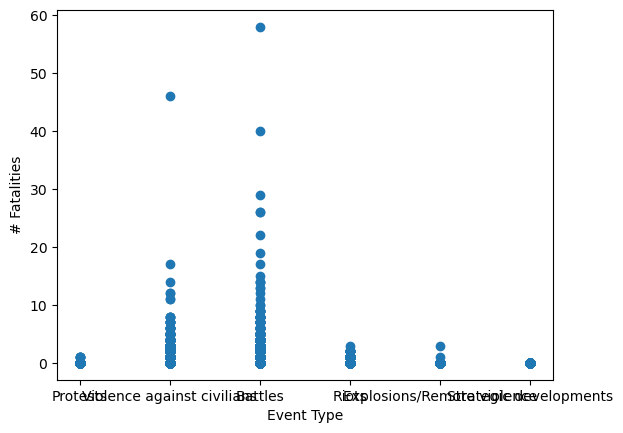

In [227]:
# BONUS Section

# TODO YOUR CODE GOES HERE

bonus_df = df[['LATITUDE', 'LONGITUDE', 'FATALITIES', 'EVENT_TYPE']]

latitude_fatalities = bonus_df['FATALITIES'].corr(bonus_df['LATITUDE'])
longitude_fatalities = bonus_df['FATALITIES'].corr(bonus_df['LONGITUDE'])

display(latitude_fatalities)
display(longitude_fatalities)

#since neither the latitude_fatalities nor the longitude_fatalities correlation are close to 1 (positive) or -1 (negative), there does 
#not appear to be a good correlation between fatalities and the latitude/longitude (considering they are both relatively close to 0)
#since the event type is not a numerical value, I will try and plot it against fatalities to see if there is a correlation
plt.scatter(bonus_df['EVENT_TYPE'], bonus_df['FATALITIES'])
plt.xlabel('Event Type')
plt.ylabel('# Fatalities')
plt.show()
#as you can see from the below graph, there does appear to be some sort of correlation between the event type and the number of fatalities,
#as there seems to be some logical grouping of the data points, with each event type having a clear grouping until 10 fatalities

#citations:
#https://www.programiz.com/python-programming/recursion
#https://www.investopedia.com/terms/c/correlationcoefficient.asp
#https://pandas.pydata.org/docs/reference/api/pandas.cut.html
#https://stackoverflow.com/questions/46472809/python-binning-based-on-2-columns-in-pandas
#https://pbpython.com/pandas-qcut-cut.html
#pseudocode from lecture slides
#http://www2.cs.uregina.ca/~dbd/cs831/notes/dcubes/iceberg.html#:~:text=The%20bottom%2Dup%20computation%20algorithm,attribute%20in%20the%20input%20table
#https://www.shikhadeep.com.np/2021/12/describe-buc-method-for-computing.html
#https://github.com/AsaadMe/BUC-Iceberg-Cube/blob/master/project-buc.py

### Assessment for bonus section

***!This cell is completed only by your marker!***


| #  | Task          |Mark | Out of  |  Comments |
|----|---------------|-----|---------|-----------|
| 1  | Bonus         |     | /5      |           |


## Academic Integrity

The following is template information. If there is any ambiguity or contradiction with official Dalhousie University policies, those Dalhousie University policies take effect.

At Dalhousie University, we respect the values of academic integrity: honesty, trust, fairness, responsibility, and respect. As a student, adherence to the values of academic integrity and related policies is a requirement of being part of the academic community at Dalhousie University.

### What does academic integrity mean?

Academic integrity means being honest in the fulfillment of your academic responsibilities thus establishing mutual trust. Fairness is essential to the interactions of the academic community and is achieved through respect for the opinions and ideas of others. Violations of intellectual honesty are oﬀensive to the entire academic community, not just to the individual faculty member and students in whose class an oﬀence occur (See the Dalhousie Secretariat's page on [Academic Integrity](https://www.dal.ca/dept/university_secretariat/academic-integrity.html).

### How can you achieve academic integrity?

- Make sure you understand Dalhousie’s policies on academic integrity.
- Give appropriate credit to the sources used in your assignment such as written or oral work, computer codes/programs, artistic or architectural works, scientific projects,  performances,  web page designs, graphical representations, diagrams, videos, and images. Use [RefWorks](http://www.library.dal.ca/How/RefWorks) to keep track of your research and edit and format bibliographies in the citation style required by the instructor.
- Do not download the work of another from the Internet and submit it as your own.
- Do not submit work that has been completed through collaboration or previously submitted for another assignment without permission from your instructor.
- Do not write an examination or test for someone else.
- Do not falsify data or lab results.

These examples should be considered only as a guide and not an exhaustive list.

### What will happen if an allegation of an academic oﬀence is made against you?

The teaching team is required to report any suspected oﬀence. The full process is outlined in the Discipline flow chart, which can be found [here](https://cdn.dal.ca/content/dam/dalhousie/pdf/dept/university_secretariat/FDPflowchartSEpt2016.pdf) and includes the following:

1. Each Faculty has an Academic Integrity Oﬃcer (AIO) who receives allegations from instructors.
2. The AIO decides whether to proceed with the allegation and you will be notified of the process.
3. If the case proceeds, you will receive an INC (incomplete) grade until the matter is resolved.
4. If you are found guilty of an academic oﬀence, a penalty will be assigned ranging from a warning to a suspension or expulsion from the University and can include a notation on your transcript, failure of the assignment or failure of the course. All penalties are academic in nature.

### Where can you turn for help?

- If you are ever unsure about ANYTHING, contact the teaching team or lead instructor.
- The Academic Integrity website (http://academicintegrity.dal.ca) has links to policies, definitions, online tutorials, tips on citing and paraphrasing.
- The Writing Center provides assistance with proofreading, writing styles, citations.
- Dalhousie Libraries have workshops, online tutorials, citation guides, Assignment Calculator, RefWorks, etc.
- The Dalhousie Student Advocacy Service assists students with academic appeals and student discipline procedures.
- The Senate Oﬃce provides links to a list of Academic Integrity Oﬃcers, discipline flow chart, and Senate Discipline Committee.


## Academic offenses

There is a zero-tolerance policy on academic offenses such as plagiarism or inappropriate collaboration. By submitting your solution for this assignment, you acknowledge that the code submitted is your own work. You also agree that your code may be submitted to plagiarism detection software (such as MOSS) unless you have notified the teaching team otherwise, in writing, before the submission deadline. Any suspected act of plagiarism will be reported to the Faculty’s Academic Integrity Officer in accordance with Dalhousie University’s regulations regarding Academic Integrity. Please note that:

1. The assignments are individual assignments. You can discuss the problems with your friends/classmates, but you need to write your program by yourself. There should not be much similarity in terms of coding. 
2. When you refer to some online resources to complete your program, you need to understand the mechanism, then write your own code. Your code should not be similar to the online resources. In addition, you should cite the sources via comments in your program.

